<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [99]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



**Solucion:** Hagamos los graficos de dispersion pedidos.

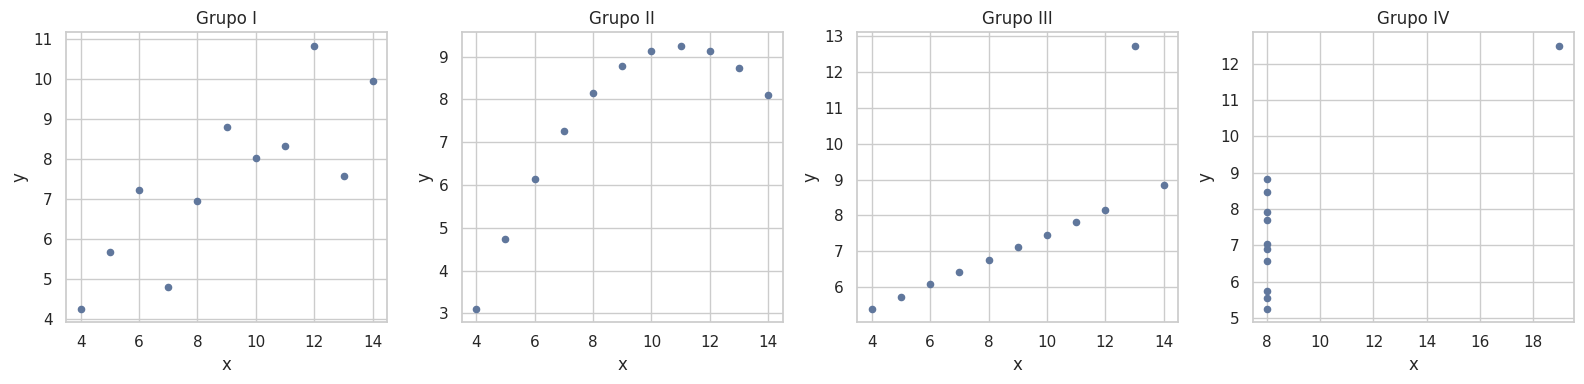

In [100]:
# Create subplots for each group
fig, axes = plt.subplots(nrows=1, ncols=len(data['dataset'].unique()), figsize=(16, 4))
axes = axes.flatten() # Flatten in case of single row/column layout

for i, (name, group) in enumerate(data.groupby('dataset')):
    group.plot(x='x', y='y', kind='scatter', ax=axes[i], title=f'Grupo {name}')
    axes[i].set_ylabel('y')
    axes[i].set_xlabel('x')

plt.tight_layout()
plt.show()

Podemos ver que los cuatro grupos tienen la misma cantidad de puntos, aunque estan dispersas de forma bastante distinta.

- Grupo I: Parece estar esparcido como una muestra de una variable aleatoria. Los datos parecen en promedio aumentar en $y$ a medida que aumenta $x$.

- Grupo II: Los datos parecen trazar una parábola, donde se graficaron los puntos correspondientes a los valores en $x$ enteros entre $4$ y $14$. Estos valores de $x$ son similares al Grupo I.

- Grupo III: Los datos parecen trazar una recta, excepto exactamente un valor que parece estar bastante alejado de este patrón. Similar a los grupos I y II, se graficaron los puntos con las mismas coordenadas $x$, pero valores $y$ distintos

- Grupo IV: Todos los datos salvo uno se acumulan en la recta $x=4$, y parecen estar dispersos aleatoriamente en $y$ entre los valores $5$ y $9$. El dato que no cumple este patrón tiene valores en $x$ y en $y$ mucho mas altos. Este dato anómalo se parece a lo encontrado en el Grupo III.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


**Solucion:** Usemos el comando `describe` para obtener información estadística de cada uno de estos datasets.

In [101]:
data.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Podemos ver que todos los grupos tienen la misma media y desviación estandar en $x$. Más aún, aunque en $y$ no sean exactamente iguales, los grupos I, II y IV son iguales, y el grupo III es distinto en media por una diferencia del orden de $10^{-4}$, y en desviación estandar del orden de $10^{-3}$.

La principal similaridad en las otras estadísticas que podemos destacar son que los grupos I, II y II tienen los mismos cuartiles, máximos y mínimos en la variable $x$. En el resto de las características, parecen ser bastante distintos:

- Grupo I: En la variable $y$, todos los valores que toman cuartiles y su máximo y su mínimo no son extremos, es decir siempre hay otro grupo distinto que tiene esas mismas características menores o mayores.

- Grupo II: En la variable $y$, posee el menor mínimo y menor máximo, y la mayor desviación estandar y mayor cuartil del 75% entre todos los grupos.

- Grupo III: En la variable $y$, posee la menor media (por poco), y el mayor mínimo y el mayor máximo entre todos los grupos.

- Grupo IV: En la variable $x$, tiene idéntico mínimo con los cuartiles de 25%, 50% y 75%, y presenta el mayor máximo. En la variable $y$, posee el menor cuartil del 50%.


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



**Solución:** Implementemos el ajuste pedido. Creemos unas funciones auxiliares primero para calcular las metricas pedidas.

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar las métricas
def regression_metrics(df: pd.DataFrame, group) -> pd.DataFrame:
    """
    Aplicar las distintas métricas definidas
    :param df: dataframe con las columnas: ['y', 'yhat']
    :return: dataframe con las métricas especificadas
    """
    y_true = df['y']
    y_pred = df['yhat']

    mse = round(mean_squared_error(y_true, y_pred), 4)
    r2 = round(r2_score(y_true, y_pred), 4)

    df_result = pd.DataFrame({'group': [group], 'mse': [mse], 'r2': [r2]})

    return df_result

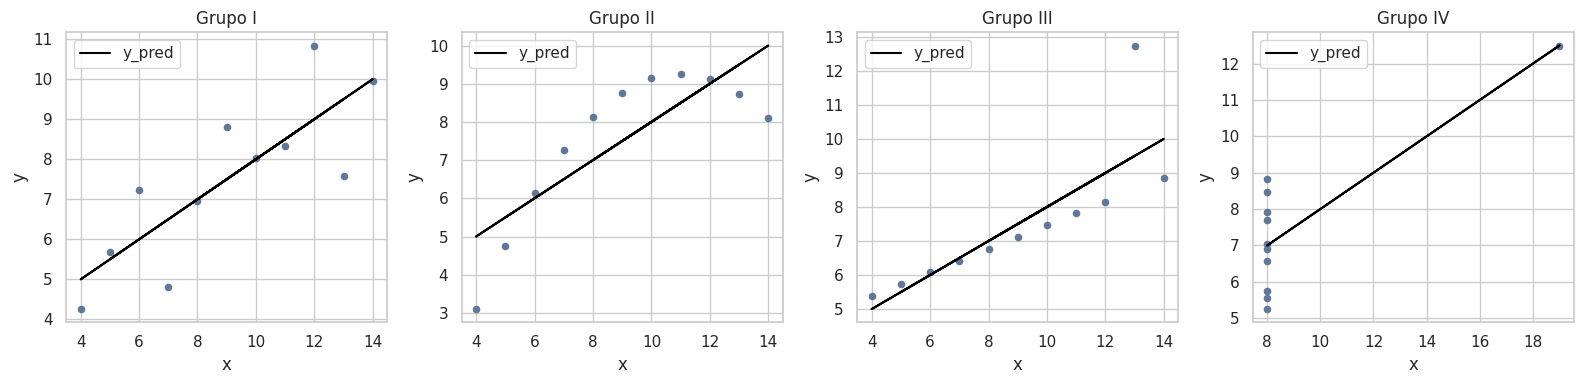

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Guarda las métricas a calcular.
results = pd.DataFrame({'group':[],'mse':[],'r2':[]})

fig, axes = plt.subplots(nrows=1, ncols=len(data['dataset'].unique()), figsize=(16, 4))
axes = axes.flatten() # Flatten in case of single row/column layout

i=0

for name, group in data.groupby('dataset'):
    #Entrena un modelo de regresion lineal en cada grupo por separado
    X = group[['x']]
    y_true = group['y']

    rlog = LinearRegression()
    rlog.fit(X,y_true)
    y_pred = rlog.predict(X)

    #Calcula las métricas
    df_temp = pd.DataFrame({'y':y_true,'yhat':y_pred})
    df_metrics = regression_metrics(df_temp, name)
    results = pd.concat([results, df_metrics])

    #Genera un grafo de la regresión lineal obtenida junto con los datos originales
    group['y_pred'] = y_pred
    group.plot(x='x', y='y_pred', kind='line', color='black', ax=axes[i], title=f'Grupo {name}')
    group.plot(x='x', y='y', kind='scatter', ax=axes[i], title=f'Grupo {name}')

    axes[i].set_ylabel('y')
    axes[i].set_xlabel('x')

    i+=1

plt.tight_layout()
plt.show()



Podemos ver que las regresiones lineales son iguales en los grupos I, II y III. Podemos ver que el Grupo IV no aparenta ser parecido a priori, pero vemos que pasa por los pares de coordenadas $(8,7)$ y $(12,9)$, que son los mismos puntos por los que pasan las otras regresiones. Como dos puntos determinan una misma recta, entonces las cuatro regresiones lineales son idénticas sobre estos cuatro grupos. Veamos las métricas que calculamos.

In [104]:
results

,group,mse,r2
0,I,1.2512,0.6665
0,II,1.2524,0.6662
0,III,1.2506,0.6663
0,IV,1.2493,0.6667


Podemos también apreciar que ambas métricas calculadas son extremadamene parecidas, todas teniendo diferencias en MSE del orden de $10^{-3}$ y diferencias de $R^2$ del orden de $10^{-4}$.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

**Solución:** Realicemos un analisis grupo por grupo de que cambio puede hacerse para obtener una buena regresión de los datos.

- Grupo I: Parece estar bien la regresión lineal, por la dispersion grande de los datos y el comportamiento no obviamente polinomial de los datos.

- Grupo II: La regresión lineal no parece adecuada, y parece mejor intentar una regresión cuadrática.

- Grupo III: Una regresión lineal parece adecuada, pero eliminando el dato claramente fuera del patron del dataset en $x=13$.

- Grupo IV: Lo mismo que con el Grupo III, pero además conviene cambiar los ejes para no tener problemas con pendientes infinitas. En tal caso estariamos prediciendo `x` con los valores en `y`.

Efectuemos los cambios a un dataset nuevo y hagamos el mismo análisis anterior. Se buscaron los índices de los datos que quitar a fuerza bruta, pues el dataframe es suficientemente pequeño para poder buscarlo de esta forma.

In [108]:
data_filter = data.copy()

#Botar datos anomalos
data_filter.drop([24,40], inplace=True)

#Separar los datos del grupo IV para realizar cambio de ejes
data_filter_IV = data_filter[data_filter['dataset']=='IV']
data_filter_IV.columns=['dataset','y','x']

#Juntar los datos y obtener el dataframe final
data_filter_not_IV = data_filter[data_filter['dataset']!='IV']
data_final = pd.concat([data_filter_not_IV, data_filter_IV], ignore_index=True)

data_final

,dataset,x,y
0,I,10.00,8.04
1,I,8.00,6.95
2,I,13.00,7.58
3,I,9.00,8.81
4,I,11.00,8.33
5,I,14.00,9.96
6,I,6.00,7.24
7,I,4.00,4.26
8,I,12.00,10.84
9,I,7.00,4.82


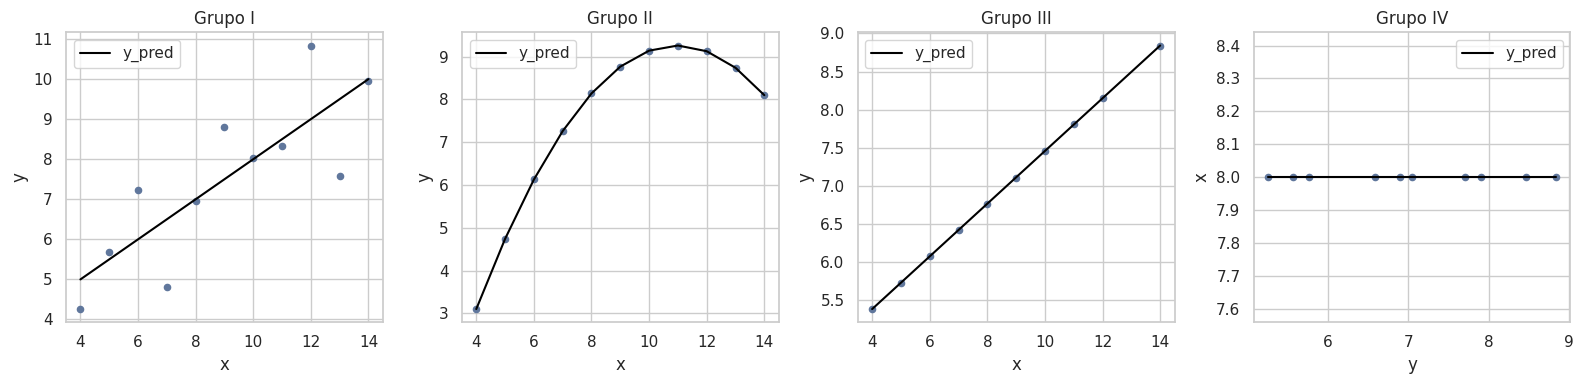

In [106]:
from sklearn.preprocessing import PolynomialFeatures

#Guarda las métricas a calcular.
results_filter = pd.DataFrame({'group':[],'mse':[],'r2':[]})

fig, axes = plt.subplots(nrows=1, ncols=len(data['dataset'].unique()), figsize=(16, 4))
axes = axes.flatten() # Flatten in case of single row/column layout

models = [LinearRegression(),]
i=0

for name, group in data_final.groupby('dataset'):
    #Entrena un modelo de regresion lineal en cada grupo distinto de IV por separado
    X = group[['x']]
    y_true = group['y']

    if i==1:
      poly = PolynomialFeatures(degree=2)
      X = poly.fit_transform(X)

    linreg = LinearRegression()
    linreg.fit(X,y_true)
    y_pred = linreg.predict(X)

    #Calcula las métricas
    df_temp = pd.DataFrame({'y':y_true,'yhat':y_pred})
    df_metrics = regression_metrics(df_temp, name)
    results_filter = pd.concat([results_filter, df_metrics])

    #Genera un grafo de la regresión lineal obtenida junto con los datos originales
    group['y_pred'] = y_pred
    group.sort_values(by='x',ascending=True).plot(x='x', y='y_pred', kind='line', color='black', ax=axes[i], title=f'Grupo {name}')
    group.plot(x='x', y='y', kind='scatter', ax=axes[i], title=f'Grupo {name}')

    axes[i].set_ylabel('y')
    axes[i].set_xlabel('x')

    i+=1

axes[3].set_ylabel('x')
axes[3].set_xlabel('y')

plt.tight_layout()
plt.show()

Podemos ver que los ajustes que hicimos mejoran mucho mas la regresión realizada a los grupos II, III y IV. Veamos las métricas obtenidas.

In [107]:
results_filter

,group,mse,r2
0,I,1.2512,0.6665
0,II,0.0000,1.0000
0,III,0.0000,1.0000
0,IV,0.0000,1.0000


Podemos ver que acertamos con el comportamiento de los grupos II, III y IV obteniendo una regresión sin errores.